In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
from sklearn import preprocessing

In [2]:
rcParams['figure.figsize'] = 8, 5
plt.rc('grid', linestyle="--", color='gray')

# https://learnui.design/tools/data-color-picker.html#palette
colors = ['#33508f', '#ff5d68', '#ffa600','#af4f9b']

In [3]:
results = pd.read_csv("results_anonymized_bala5.csv")
results.head()

,ED/ES,Vendor,Centre,Dice LV,Jaccard LV,Hausdorff LV,ASSD LV,Dice MYO,Jaccard MYO,Hausdorff MYO,ASSD MYO,Dice RV,Jaccard RV,Hausdorff RV,ASSD RV
0,ED,D,5,0.963499,0.929569,4.557500,0.169718,0.829316,0.708403,6.572920,0.327894,0.852318,0.742644,12.641991,2.457218
1,ED,D,5,0.822413,0.698389,30.000000,3.725749,0.669031,0.502665,20.391677,1.701861,0.436207,0.278941,30.500166,5.478045
2,ES,D,5,0.938378,0.883910,51.939648,0.476115,0.844842,0.731365,15.094028,0.916583,0.817580,0.691446,12.298717,2.102652
3,ED,C,4,0.968913,0.939700,9.459459,0.245456,0.905457,0.827247,11.616956,0.362022,0.838464,0.721858,12.542887,3.532332
4,ES,A,1,0.894509,0.809150,7.968750,0.583163,0.876493,0.780140,11.953125,0.917322,0.827698,0.706045,13.073926,1.064549


In [4]:
print("-- Segmentation scores --\n")
print("Min Jaccard LV: {:.4f} / Max Jaccard LV: {:.4f}".format(results["Jaccard LV"].min(), results["Jaccard LV"].max()))
print("Min Jaccard RV: {:.4f} / Max Jaccard RV: {:.4f}".format(results["Jaccard RV"].min(), results["Jaccard RV"].max()))
print("Min Jaccard MYO: {:.4f} / Max Jaccard MYO: {:.4f}".format(results["Jaccard MYO"].min(), results["Jaccard MYO"].max()))

print()
print("Min Dice LV: {:.4f} / Max Dice LV: {:.4f}".format(results["Dice LV"].min(), results["Dice LV"].max()))
print("Min Dice RV: {:.4f} / Max Dice RV: {:.4f}".format(results["Dice RV"].min(), results["Dice RV"].max()))
print("Min Dice MYO: {:.4f} / Max Dice MYO: {:.4f}".format(results["Dice MYO"].min(), results["Dice MYO"].max()))

print()
print("Min Hausdorff LV: {:.4f} / Max Hausdorff LV: {:.4f}".format(results["Hausdorff LV"].min(), results["Hausdorff LV"].max()))
print("Min Hausdorff RV: {:.4f} / Max Hausdorff RV: {:.4f}".format(results["Hausdorff RV"].min(), results["Hausdorff RV"].max()))
print("Min Hausdorff MYO: {:.4f} / Max Hausdorff MYO: {:.4f}".format(results["Hausdorff MYO"].min(), results["Hausdorff MYO"].max()))

print()
print("Min ASSD LV: {:.4f} / Max ASSD LV: {:.4f}".format(results["ASSD LV"].min(), results["ASSD LV"].max()))
print("Min ASSD RV: {:.4f} / Max ASSD RV: {:.4f}".format(results["ASSD RV"].min(), results["ASSD RV"].max()))
print("Min ASSD MYO: {:.4f} / Max ASSD MYO: {:.4f}".format(results["ASSD MYO"].min(), results["ASSD MYO"].max()))

-- Segmentation scores --

Min Jaccard LV: 0.4905 / Max Jaccard LV: 0.9650
Min Jaccard RV: 0.2008 / Max Jaccard RV: 0.9544
Min Jaccard MYO: 0.5027 / Max Jaccard MYO: 0.8856

Min Dice LV: 0.6582 / Max Dice LV: 0.9822
Min Dice RV: 0.3344 / Max Dice RV: 0.9767
Min Dice MYO: 0.6690 / Max Dice MYO: 0.9393

Min Hausdorff LV: 2.0669 / Max Hausdorff LV: 51.9396
Min Hausdorff RV: 2.6440 / Max Hausdorff RV: 82.3867
Min Hausdorff MYO: 3.7392 / Max Hausdorff MYO: 111.5847

Min ASSD LV: 0.1067 / Max ASSD LV: 4.2634
Min ASSD RV: 0.0904 / Max ASSD RV: 7.2437
Min ASSD MYO: 0.2285 / Max ASSD MYO: 2.8579


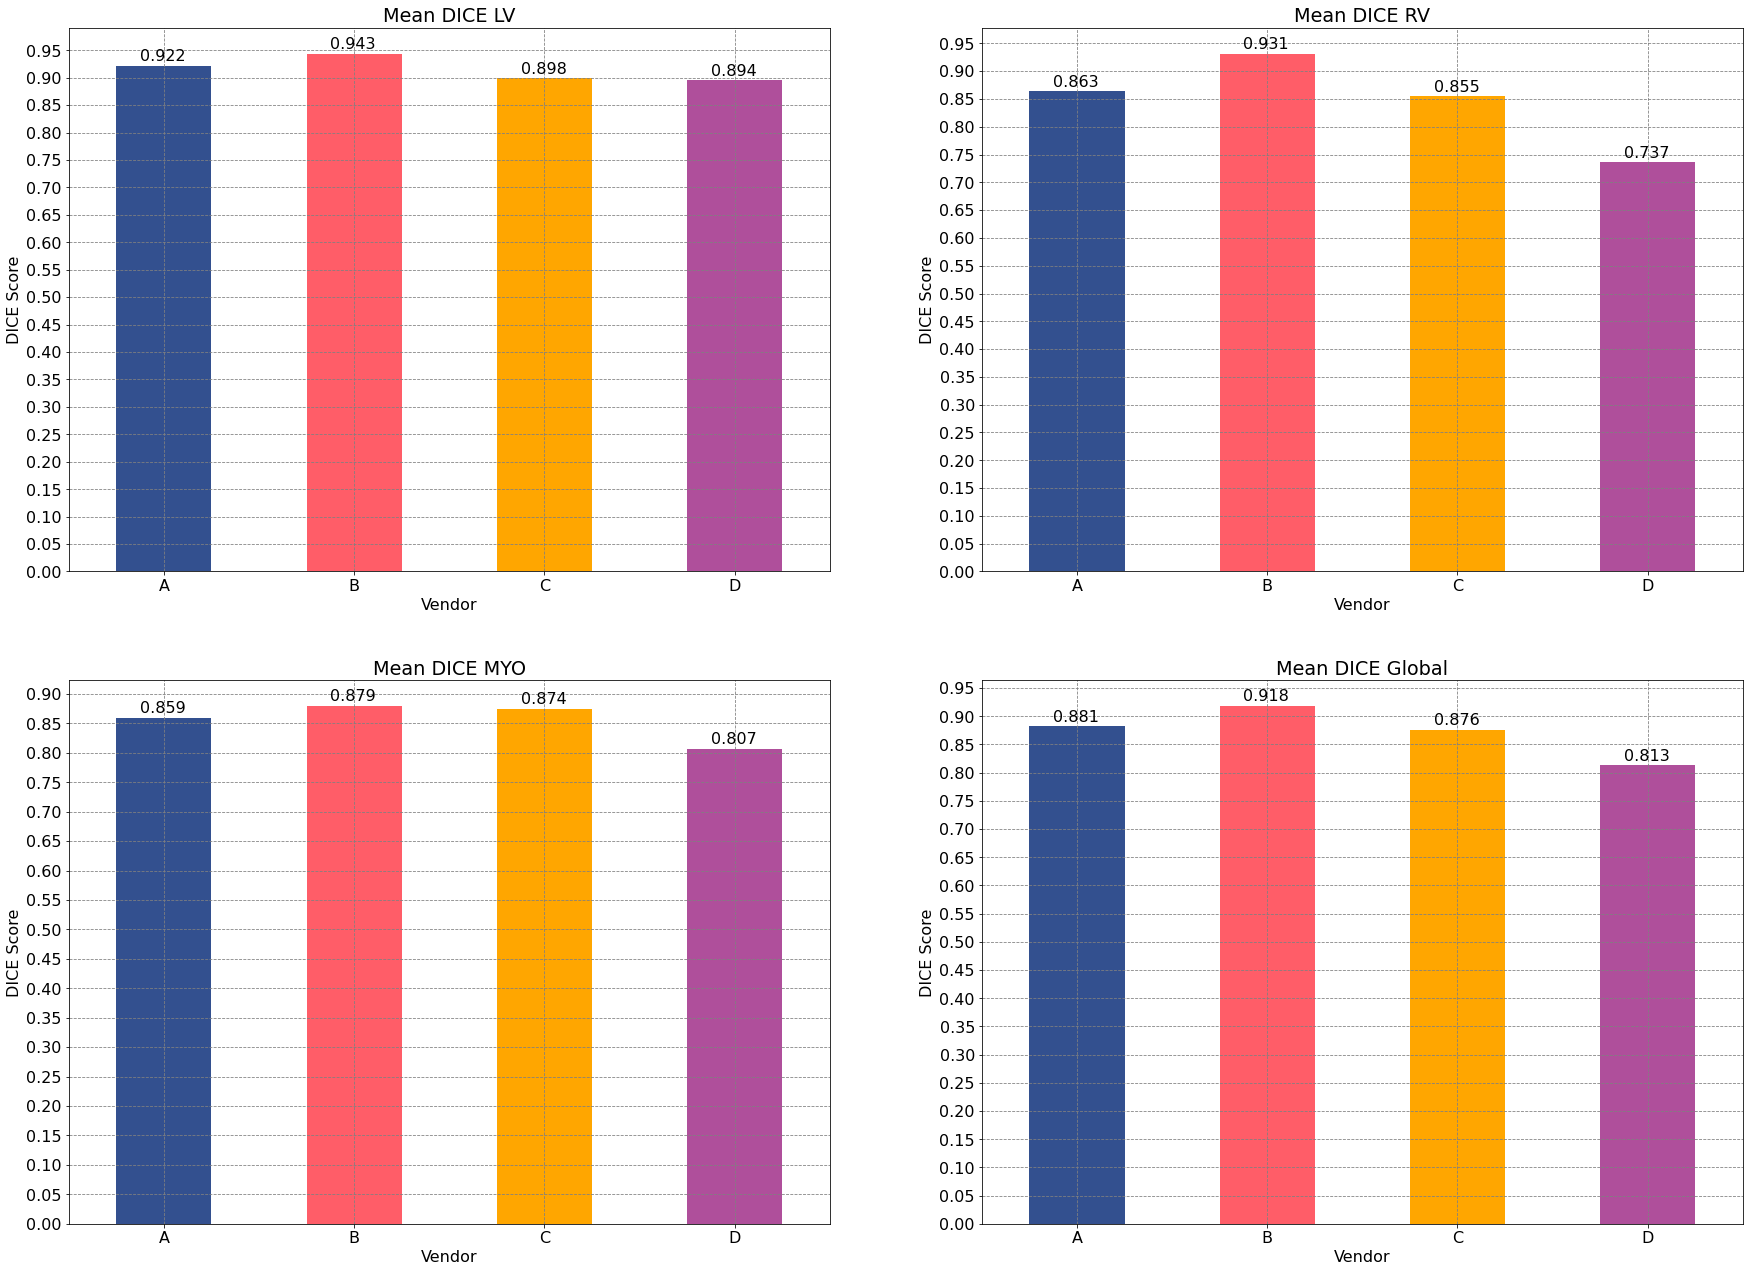

In [5]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("DICE Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean DICE LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Dice RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean DICE RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("DICE Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean DICE MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("DICE Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean DICE Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('dice_vendor.png', bbox_inches='tight', dpi=160)

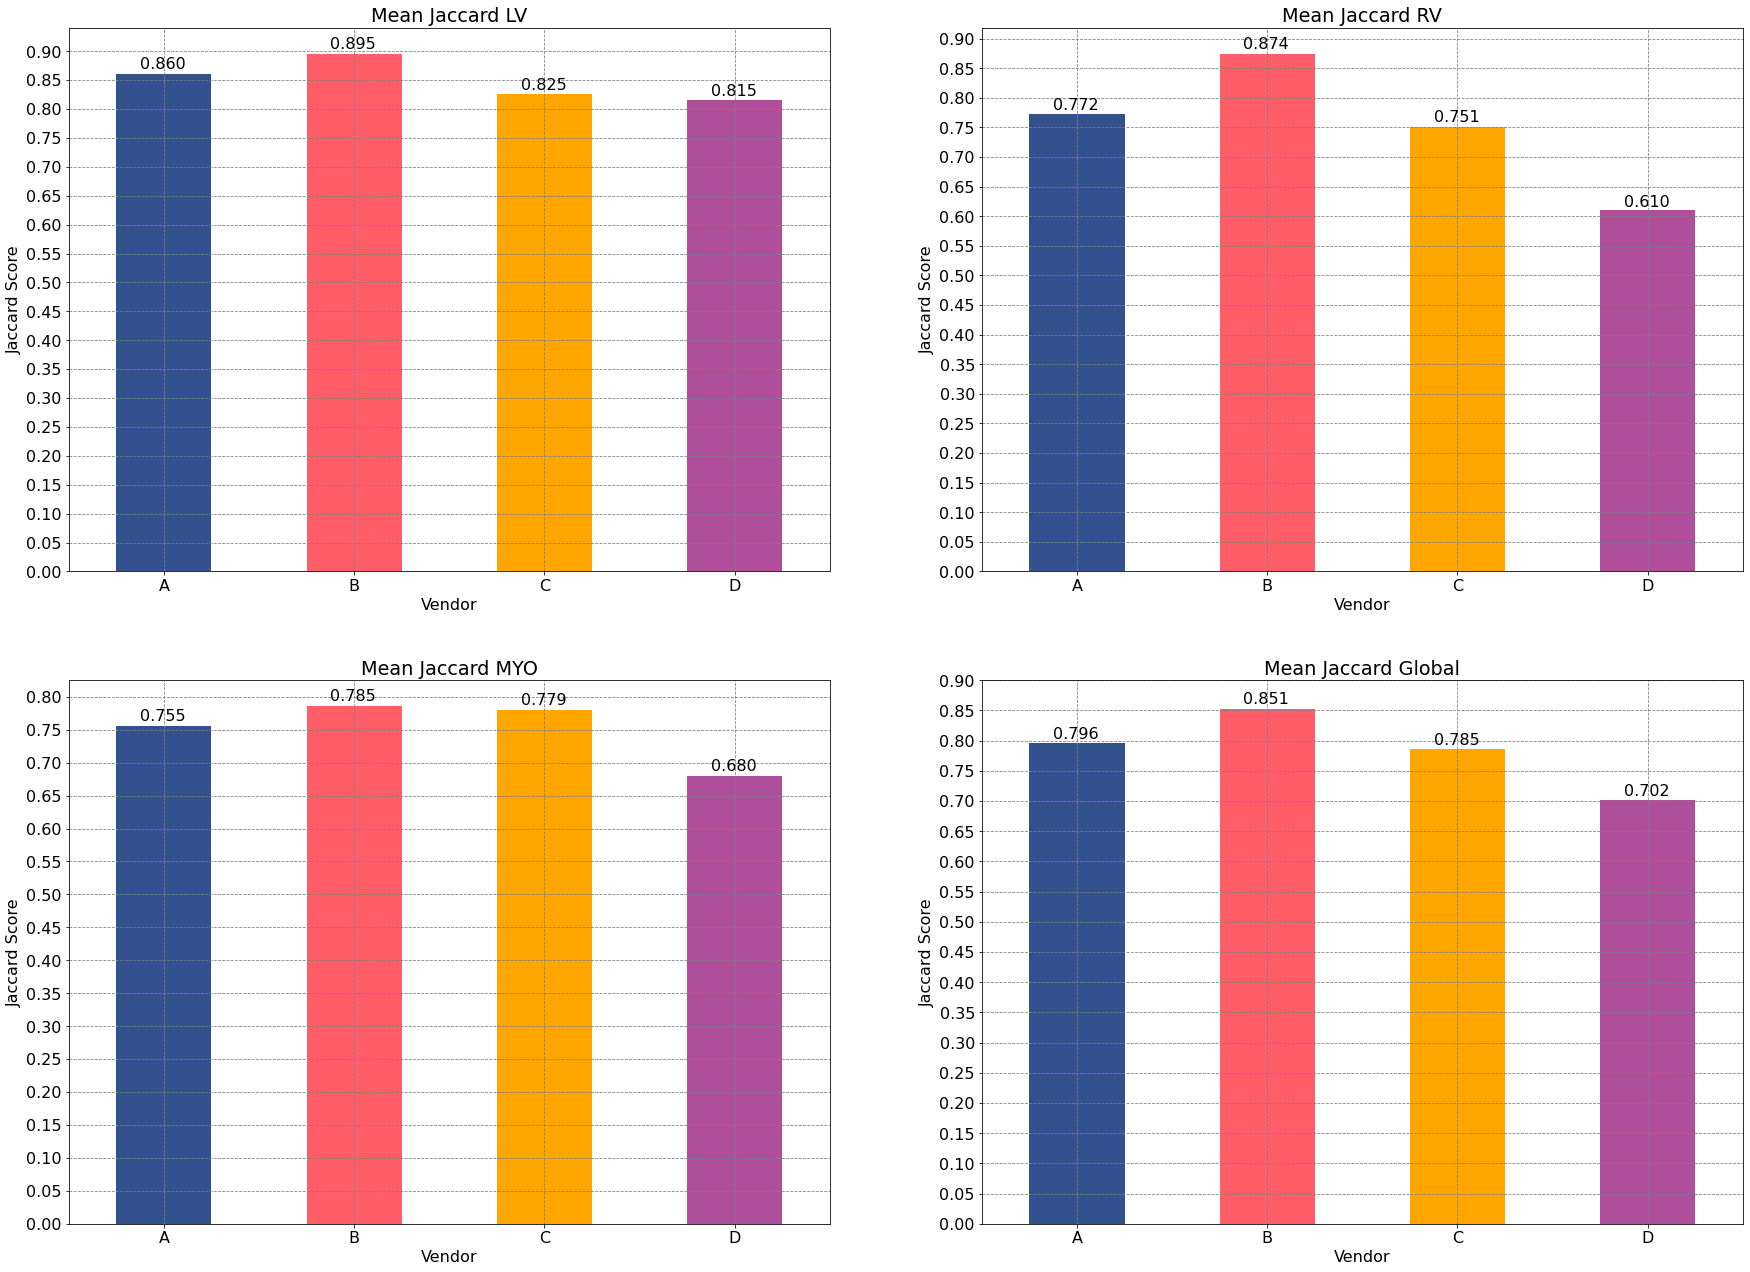

In [6]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean Jaccard LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Jaccard Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean Jaccard RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Jaccard Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean Jaccard MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Jaccard Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean Jaccard Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('jaccard_vendor.png', bbox_inches='tight', dpi=160)

In [7]:
results.groupby("Vendor")["Hausdorff MYO"].mean().max()

19.240812748228624

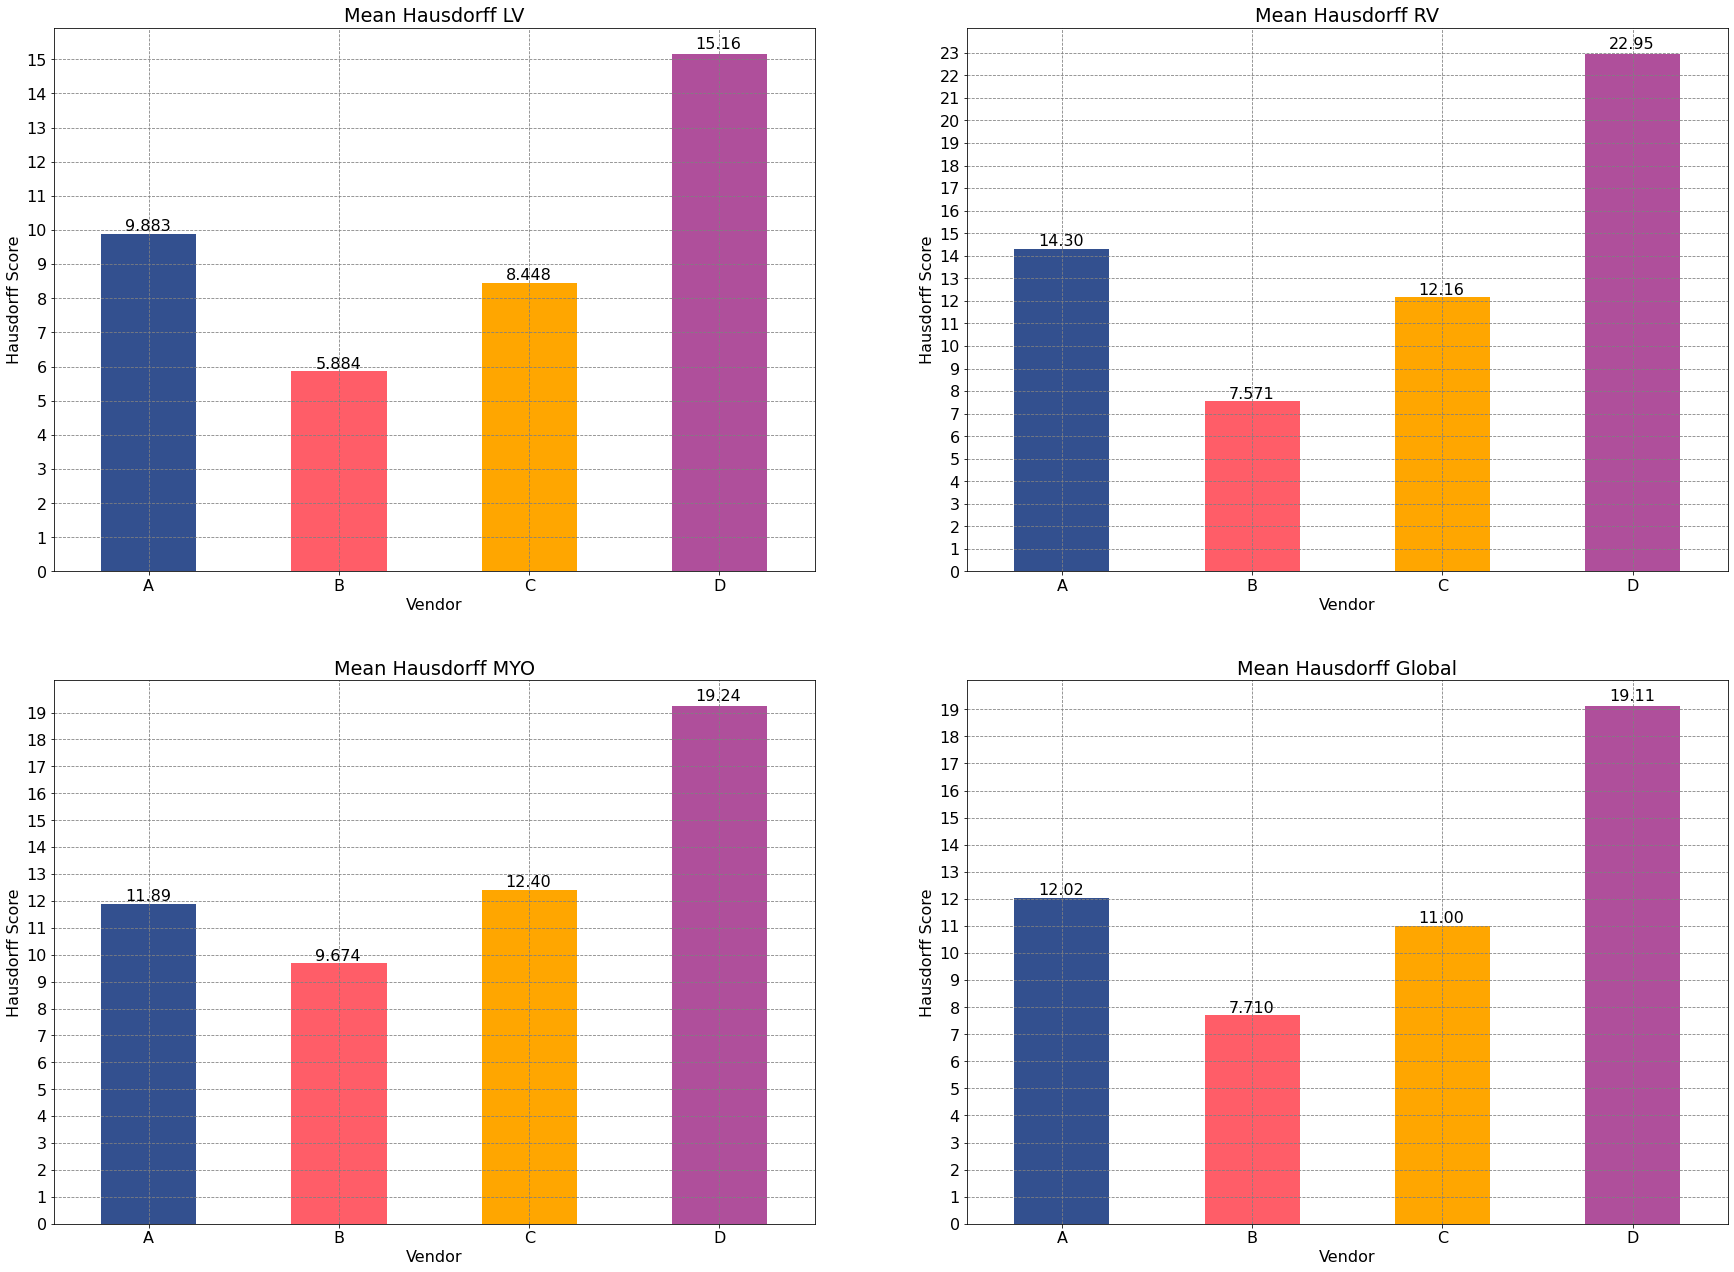

In [8]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Hausdorff Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff LV"].mean().max()+0.05, 1))
ax1[0].set_title("Mean Hausdorff LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Hausdorff Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff RV"].mean().max()+0.05, 1))
ax1[1].set_title("Mean Hausdorff RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff MYO"].mean().max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Hausdorff Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[1].set_title("Mean Hausdorff Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('hausdorff_vendor.png', bbox_inches='tight', dpi=160)

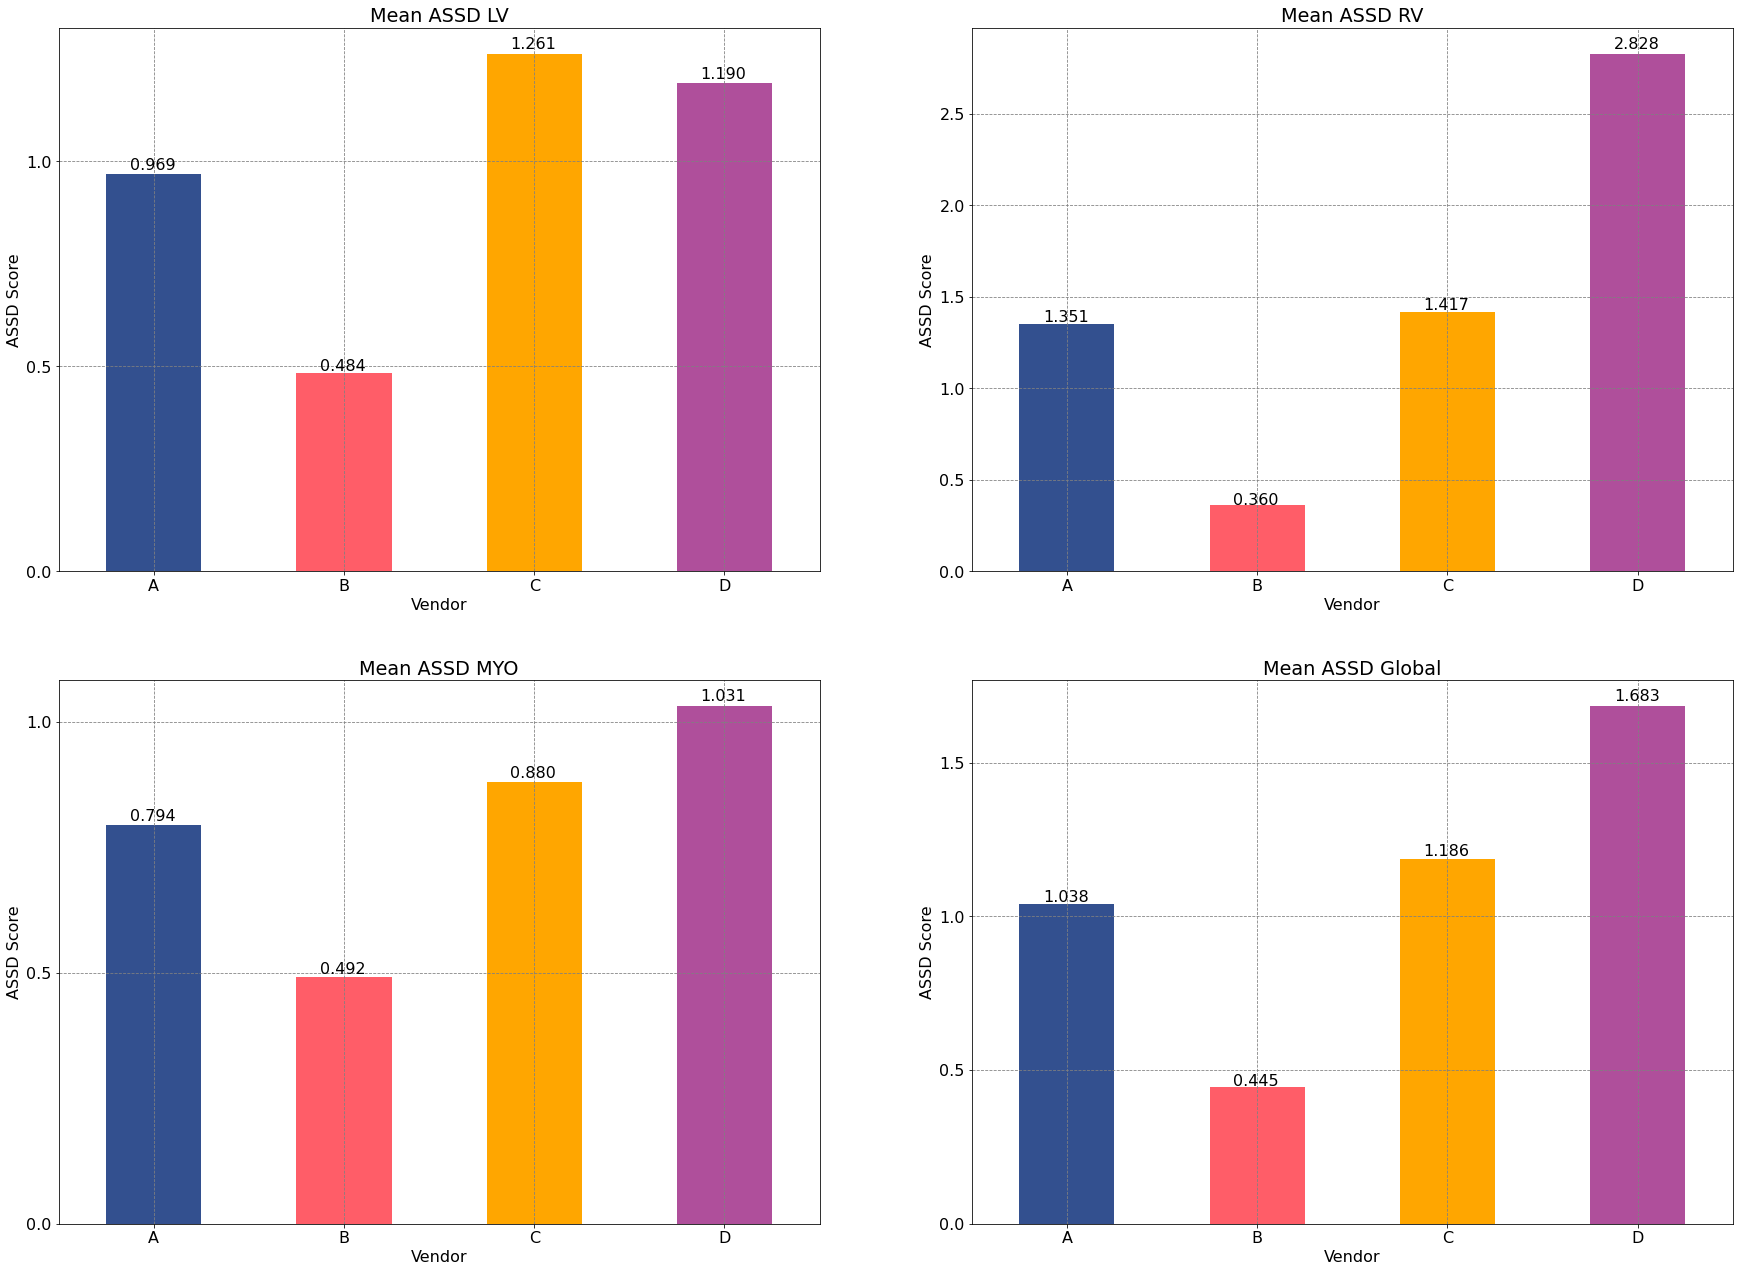

In [9]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("ASSD Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD LV"].mean().max()+0.05, 0.5))
ax1[0].set_title("Mean ASSD LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("ASSD Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD RV"].mean().max()+0.05, 0.5))
ax1[1].set_title("Mean ASSD RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("ASSD Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD MYO"].mean().max()+0.05, 0.5))
ax2[0].set_title("Mean ASSD MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('assd_vendor.png', bbox_inches='tight', dpi=160)

#### Average results

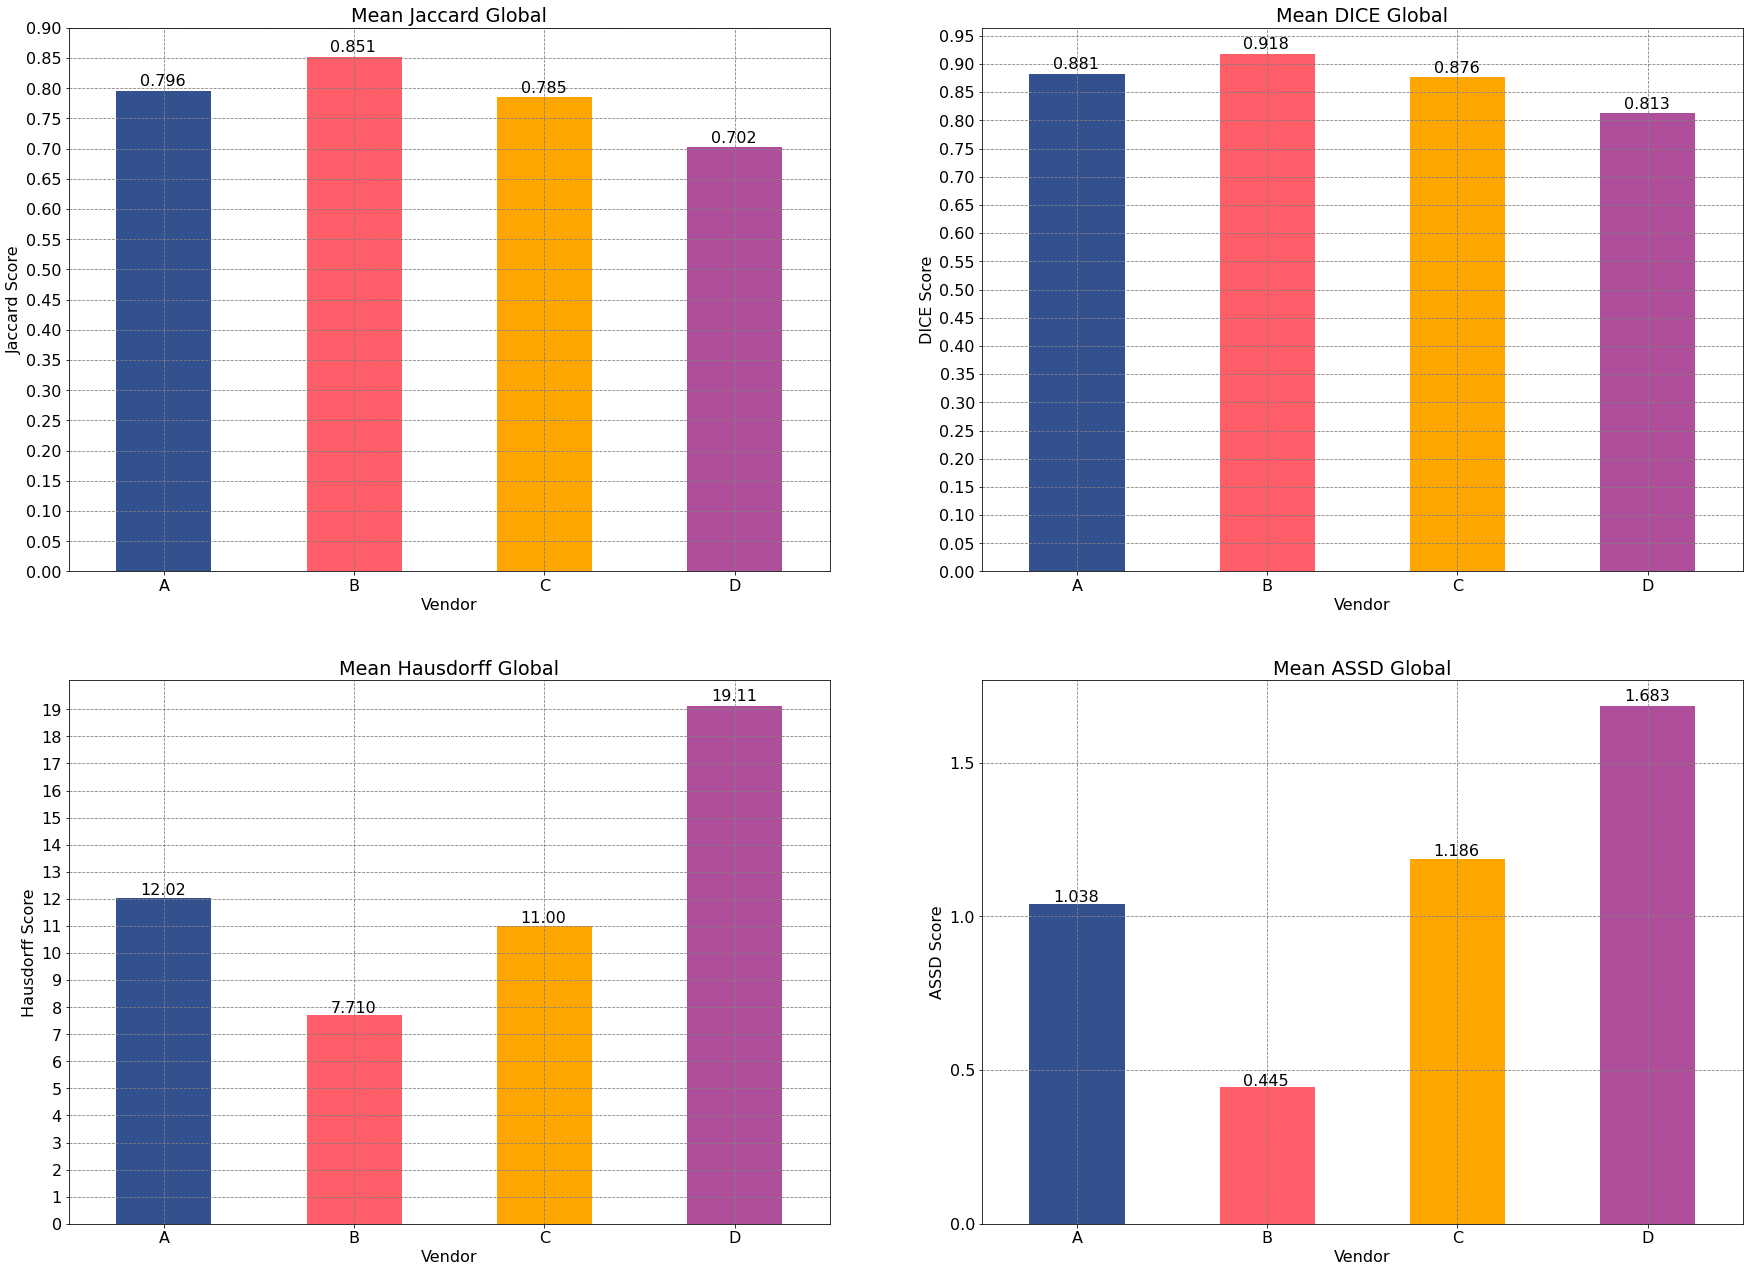

In [10]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[0].set_title("Mean Jaccard Global")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[1].set_title("Mean DICE Global")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff Global")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )

for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('mean_metrics_vendor.png', bbox_inches='tight', dpi=160)

## Ranking Metric

The details for computing the final performance rank are the following:

  1. The weighted average metric for each region (LV, RV and MYO) is computed;
  2. A min-max normalization is computed across subjects;
  3. The final normalized metrics are averaged to extract one unique value between 0 and 1;
  4. This final value is used to rank the participants.
  
Missing results in the submission will get a zero for Dice and Jaccard coefficients and the equivalent worst value for Hausdorff and surface distances. See the following example (with only the LV results) for clarity:

In [11]:
results['Dice Mean'] = results[["Dice LV", "Dice RV", "Dice MYO"]].mean(axis=1)
results['Jaccard Mean'] = results[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean(axis=1)
results['Hausdorff Mean'] = results[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean(axis=1)
results['ASSD Mean'] = results[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean(axis=1)

In [12]:
x = results[["Dice Mean", "Jaccard Mean", "Hausdorff Mean", "ASSD Mean"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
results = pd.DataFrame(x_scaled)

In [13]:
print(f"Normalized DICE: {results[0].mean()}")
print(f"Normalized Jaccard: {results[1].mean()}")
print(f"Normalized Hausdorff: {results[2].mean()}")
print(f"Normalized ASSD: {results[3].mean()}")

print(f"Computed final metric: {results.values.mean()}")

Normalized DICE: 0.7573012157629433
Normalized Jaccard: 0.7179764202320944
Normalized Hausdorff: 0.22585167438169979
Normalized ASSD: 0.2628030068291008
Computed final metric: 0.49098307930145957


In [14]:
(results[0].mean() + results[1].mean()+ (1-results[2].mean())+ (1-results[3].mean()))/4

0.7466557386960593